In [2]:
import pandas as pd, numpy as np

# Working with Time Series

Since Pandas was created to assist financial modeling, we can expect fairly extensive tools to work with time, date and time-indexed data.

In this section we'll dive deeply into exploring date/time data handeling with pandas

## Dates and Times in Python

While the Pandas date/time representations are quite versetile and useful, there exist some other ways of representing date, time and time durations in Python.

### Native Python dates and times `datetime` and `dateutil`

Pythons basic functionalities with dates and times are stored in the `datetime` module. This and the `dateutil` module helps in performing multiple useful function on time-related objects.

In [3]:
from datetime import datetime
date=datetime(year=2015,month=7,day=4)
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date.strftime('%A')

'Saturday'

The easy syntax and the flexibility in using the `datetime` and `dateutil` modules is what makes them usefull but their limitations lie in their efficiency when it comes to opperating with large amounts of data.



### Date-time formats in NumPy

The above mentioned weekness was overcome in Numpy's datetime representation. the `datetime64` datatype converts the dates into a 64 bit integer, thus allowing Arrays of dates to be represented very compactly

In [5]:
date=np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [6]:
date+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

For a given input, numpy can automatically detect the precesion of the time from the input.

In [7]:
np.datetime64('2015-11-14')

numpy.datetime64('2015-11-14')

In [8]:
np.datetime64('2015-11-05 22:59')

numpy.datetime64('2015-11-05T22:59')

In [9]:
np.datetime64('2015-07-04 12:59:59.50')


numpy.datetime64('2015-07-04T12:59:59.500')

Due to this datetime object being 64 bit, it can only encompass $2^{64}$ different unique values depending on the precesion of the variable.

i.e. if we're trying to record time down to freacking picoseconds, then we'll barely have $\pm2.6$ hours of range, but say we're recording out data in years, we'll have $\pm9.5\times10^{18}$ years of range to consider

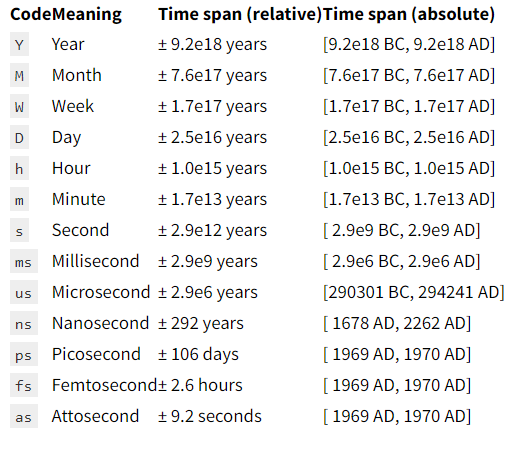

For a lot of real world appications, the `datetime64` datatype is quite effective. But, as we move on, we'll see how, inspite of addressing a lot of the issues, it lacks many convenient methods that are there in the `datetime` and the `dateutil` modules.

### Dates and times in Pandas: the best of both the worlds

Pandas builds upon all the previous features of numpy.datetime64, datetime and datetimeutil with efficient storage and effective vectorized operations which can be used in Series, Dataframe objects.

In [14]:
date=pd.to_datetime("4th of July, 2015")
print(date)
print(date.strftime('%A'))

2015-07-04 00:00:00
Saturday


We can also do Vectorized operations on this object

In [16]:
date+pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)